In [ ]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
global number_of_characters
number_of_characters = 2
def get_equation(n_equation):
  if n_equation == 0:
    return linearfunc
  elif n_equation == 1:
    return sinfunc
  elif n_equation == -1:
    return skewsin
  else:
    return ntrigs

def linearfunc(time, slope, intercept): #Associate integer = 0
  return slope * time + intercept

def sinfunc(time, amplitude, frequency, h_shift, mean): #Associate integer = 1
  return amplitude * np.sin(frequency*time + h_shift) + mean

def skewsin(time, amplitude, frequency, h_shift, mean): #Associate integer = -1
  character1 = amplitude * np.cos(frequency*time + h_shift)
  character2 = (amplitude / 5) * np.sin(2*frequency*time + h_shift)
  return  character1 - character2 + mean

# Assuming 'equation' is used to define the model for curve fitting
def trig(x, a, b, c):
    return a * np.sin(b * x + c)

def ntrigs(time, mean, *params):
    result = mean
    for i in range(0, len(params), 3):
        result += trig(time, params[i], params[i+1], params[i+2])
    return result

In [16]:
def plot(domain, range, n_equation=None, parameters=None, size=(8,4), scatter = 5, add_margins=True, step_length=0.1, color = "white"):
  #print(parameters)
  plt.style.use('dark_background')
  plt.figure(figsize=size)

  # Domain of the graphic visualization (x -axis).
  if add_margins:
    start_point = domain[0] -1
    end_point = domain[-1] + 1
  else:
    start_point = domain[0]
    end_point = domain[-1]
  x = np.arange(start_point, end_point, step_length)

  # Range and the function itself.
  if parameters or n_equation != None:
    equation = get_equation(n_equation)
    y = equation(x, *parameters)
    plt.plot(x, y, color = color)

  plt.scatter(domain, range, s = scatter)
  plt.show()

In [15]:
def remove_outliers(data):
  z = np.abs(scipy.stats.zscore(data))
  outlier_indices = np.where(z > 2)[0]
  data.drop(outlier_indices, inplace=True)
  lower_values = data[data["flux"] < np.percentile(data["flux"], 2)]
  data.drop(lower_values.index, inplace=True)
  return data

## Tset the function

In [ ]:
star_number = 1
star = remove_outliers(pd.read_csv(f"/content/drive/My Drive/Cepheids/fluxes/object"+str(star_number)+".csv"))
predictions = pd.read_csv(f"/content/drive/My Drive/Cepheids/new_method_sample.csv")
time = list(star["time"])
flux = list(star["flux"])

[13.48936374430028, 404480.0768335862]


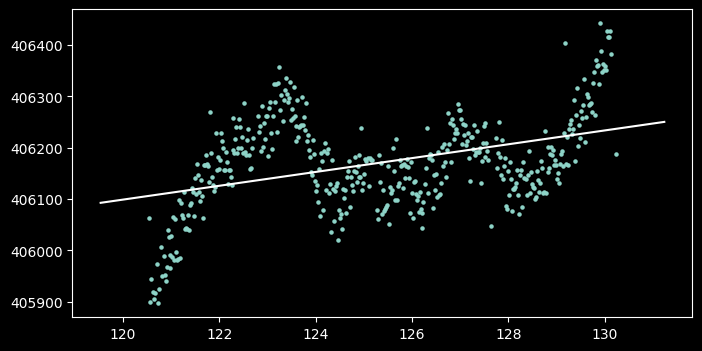

In [ ]:
slope = predictions.at[star_number-1, "linearfunc_slope"]
intercept = predictions.at[star_number-1,"linearfunc_intercept"]
prediction = list((slope, intercept))
plot(time, flux, 0, prediction)

[78.04168806310653, 1.7591107410094275, 36.58367112079706, 406174.37172155135]


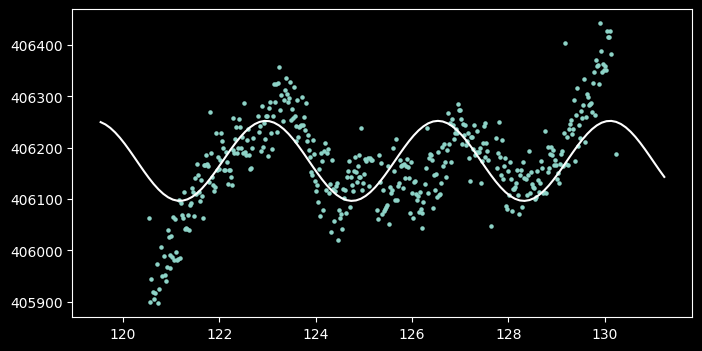

In [ ]:
amplitude = predictions.at[star_number-1, "sinfunc_amplitude"]
frequency = predictions.at[star_number-1, "sinfunc_frequency"]
h_shift = predictions.at[star_number-1, "sinfunc_h_shift"]
mean = predictions.at[star_number-1, "sinfunc_mean"]

prediction = list((amplitude, frequency, h_shift, mean))
plot(time, flux, 1, prediction)

[-40.64017310848376, 2.0643076025238614, -0.0266310102553726, 406169.69319442]


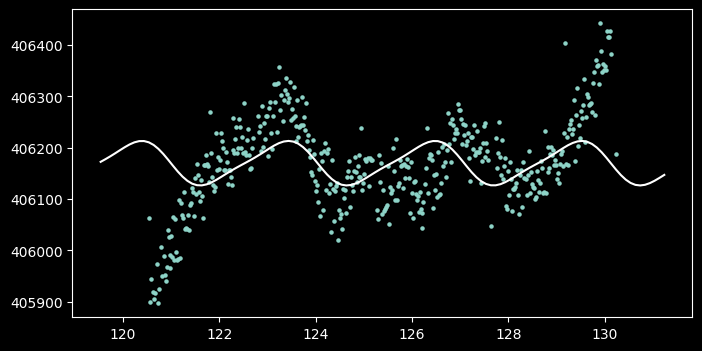

In [ ]:
amplitude = predictions.at[star_number-1, "skewsin_amplitude"]
frequency = predictions.at[star_number-1, "skewsin_frequency"]
h_shift = predictions.at[star_number-1, "skewsin_h_shift"]
mean = predictions.at[star_number-1, "skewsin_mean"]

prediction = list((amplitude, frequency, h_shift, mean))
plot(time, flux, -1, prediction)

[741809.8226219431, 74.3491506027214, 1.6923646730779172, 44.81283073982961, -335669.1833415636, 0.0027697135004221, 38.935029569128986]


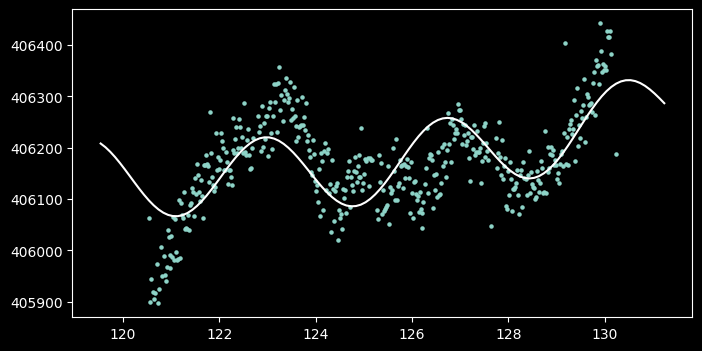

In [ ]:
mean = predictions.at[star_number-1, "twotrigs_mean"]
amplitude1 = predictions.at[star_number-1, "twotrigs_amplitude1"]
frequency1 = predictions.at[star_number-1, "twotrigs_frequency1"]
h_shift1 = predictions.at[star_number-1, "twotrigs_hshift1"]
amplitude2 = predictions.at[star_number-1, "twotrigs_amplitude2"]
frequency2 = predictions.at[star_number-1, "twotrigs_frequency2"]
h_shift2 = predictions.at[star_number-1, "twotrigs_hshift2"]

prediction = list((mean, amplitude1, frequency1, h_shift1, amplitude2, frequency2, h_shift2))
plot(time, flux, 2, prediction)

[405967.4249666258, -59.71641040019311, 1.5809305238011593, 42.857937498885136, -34041621.30748501, 0.3281292915749662, 0.1659429554376596, 34041372.219565384, 0.3281323101106378, 0.165561980347145]


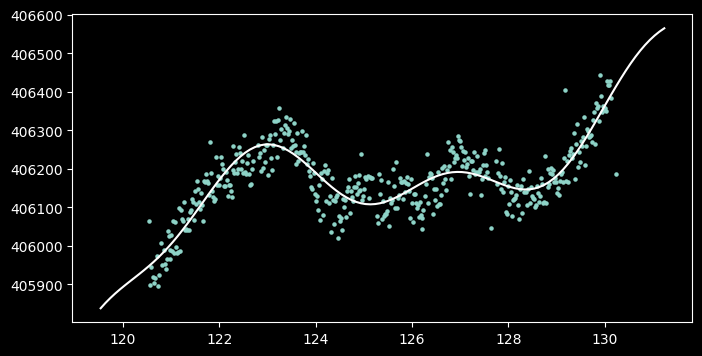

In [ ]:
mean = predictions.at[star_number-1, "threetrigs_mean"]
amplitude1 = predictions.at[star_number-1, "threetrigs_amplitude1"]
frequency1 = predictions.at[star_number-1, "threetrigs_frequency1"]
h_shift1 = predictions.at[star_number-1, "threetrigs_hshift1"]
amplitude2 = predictions.at[star_number-1, "threetrigs_amplitude2"]
frequency2 = predictions.at[star_number-1, "threetrigs_frequency2"]
h_shift2= predictions.at[star_number-1, "threetrigs_hshift2"]
amplitude3 = predictions.at[star_number-1, "threetrigs_amplitude3"]
frequency3 = predictions.at[star_number-1, "threetrigs_frequency3"]
h_shift3 = predictions.at[star_number-1, "threetrigs_hshift3"]

prediction = list((mean, amplitude1, frequency1, h_shift1, amplitude2, frequency2, h_shift2, amplitude3, frequency3, h_shift3))
plot(time, flux, 3, prediction)